# Satruation curve script. 

Here I plan to write a small script that can be used to just produce saturation curves for Contrast vs Y graphs, where Y is most likely eithe microwave or laser power, however this does not need to be exclusively the case (hopefully). 

In [1]:
import numpy as np 
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plot 
import os

In [2]:
def get_data_to_pandas(file_path):
    '''Take the file name and load the data into a pandas dataframe ready for analysis.'''
    
    params_data = pd.read_table(file_path) 
    return(params_data)

In [3]:
def sat_curve(P_uw, c_inf, P_sat):
    '''Equation to calcualte the saturaton curve for given data arrays.'''
    # p_uW = power sweep
    # y = Contrast as a functin of applied power, 
    # c_inf = maximum ODMR contrast
    # P_sat = stauration power.
    
    y = (c_inf * P_uw)/(P_uw + P_sat)
    
    return(y)
    

In [4]:
def power_curve_optimisation(x, y, P0):
    '''The saturation curve optimisation code.
    Outputs the coefficients of the curve fitting and the associated error.'''
    P = P0 # inital values variable.
    
    coeffs, confidence = opt.curve_fit(sat_curve, x, y, P) # curve fit optimization
    opt_error = np.sqrt(np.diag(confidence)) # error calculation
    
    return(coeffs, opt_error)

In [5]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 20})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [6]:
def straight_line(x, m, c):
    '''Straight line fitting'''
    
    y = m*x + c
    return (y)

In [7]:
def sqrt_fit(x, a, b, c): 
    
    y = a*np.sqrt(b*x) + c
    return(y)

### Script starts here

In [8]:
# Start with the file name and location: 
folder_location = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\2019\\20190607\\'
date = '20190607'
file_name = '20190607_NVScan_analysis'

# Open the file and copy the data into a pandas array. 
data_set = get_data_to_pandas(folder_location + file_name + '.dat')

## Applied powers not saved into the dataset, so need to create the applied power array 
## manually. 

microwave_power = np.array([39, 36, 33, 30, 27, 24, 21, 18, 15, 12, 9, 6]) # dBm
# Convert microwave power into mW
power_mW = np.power(10, microwave_power/10)

# Inital parametes for the saturation curve fitting.
P0 = [1,1]
# Find the saturation curve fitting parameters
fit_params, error = power_curve_optimisation(power_mW, data_set['Contrast (%)'][0:12], P0)

# Create the arrays used for fitting the saturation curve.
x_fit = np.linspace(max(power_mW), min(power_mW), 50)
y_fit = sat_curve(x_fit, fit_params[0], fit_params[1])

p1 = [1, 1, 1]
fit_2, con_2 = opt.curve_fit(sqrt_fit, power_mW, data_set['Contrast (%)'][0:12], p1)

y_fit_2 = sqrt_fit(x_fit, fit_2[0], fit_2[1], fit_2[2])

print(data_set['Contrast (%)'][1:11])

set_plot_params()
print(fit_params, error)

1     14.861013
2     13.528490
3     11.624092
4      9.723887
5      7.782949
6      5.730281
7      4.345368
8      3.058642
9      1.818990
10     1.457247
Name: Contrast (%), dtype: float64
[ 15.42748029 224.47672952] [ 0.58182144 35.64455088]


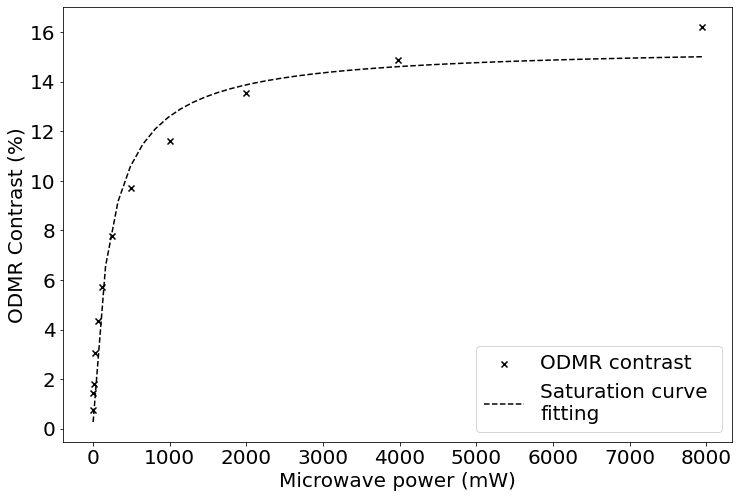

In [11]:
fig,ax = plot.subplots()
plot.scatter(power_mW, data_set['Contrast (%)'][0:12], marker = 'x', color = 'k', 
            label = 'ODMR contrast')
plot.xlabel('Microwave power (mW)')
plot.ylabel('ODMR Contrast (%)')

plot.plot(x_fit, y_fit, color = 'k', linestyle = '--', label = 'Saturation curve \nfitting')
plot.legend()
plot.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\20210607\\' + date + '_Microwave_power_sat_curve' + '.pdf')

In [18]:
#fig.savefig(folder_location + date + '_Microwave_power_sat_curve' + '.pdf')

0.13932319704920712 4.605228473473118


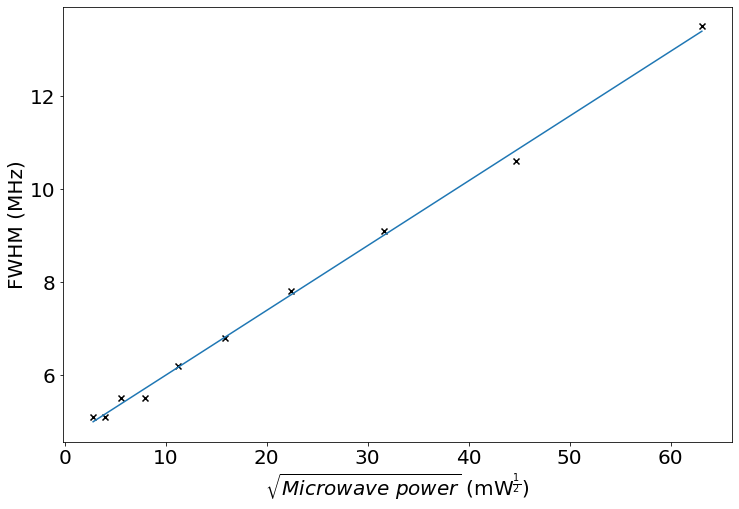

In [33]:
FWHM = np.array([13.5, 10.6, 9.1, 7.8, 6.8, 6.2, 5.5, 5.5, 5.1, 5.1])
sub_power_mW = np.sqrt(power_mW[0:len(FWHM)])
plot.scatter(sub_power_mW, FWHM, marker = 'x', color = 'k')
plot.xlabel(r'$\sqrt{Microwave ~power}$' + r' (mW$^{\frac{1}{2}})$')
plot.ylabel('FWHM (MHz)')

P = [1, 1]
coeffs, confidence = opt.curve_fit(straight_line, sub_power_mW, FWHM, P) # curve fit optimization
opt_error = np.sqrt(np.diag(confidence)) # error calculation

y = straight_line(sub_power_mW, coeffs[0], coeffs[1])
plot.plot(sub_power_mW, y)
print(coeffs[0], coeffs[1])